### group members
* Max Dunger
* [Yannik Motzet](mailto:yannik.motzet@outlook.com)

# Übung 1: Explorative Analyse und Vorverarbeitung
## 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

In [ ]:
import sys
print ("Python version: " + sys.version)
import numpy as np
print("numpy version: " + np.version.version)
import pandas as pd
print("pandas version: " + pd.__version__)
import zipfile
import json
print("json version: " + json.__version__)

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
numpy version: 1.18.5
pandas version: 1.1.3
json version: 2.0.9


load database from file



In [ ]:
# extract zip file
with zipfile.ZipFile('foods-2011-10-03.json.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# load database
database_raw = open('foods-2011-10-03.json')
database = json.load(database_raw)

get number of entries

In [ ]:
print(len(database))

6636


having a look at structure of database

In [ ]:
item_id = 1234
# print food
# print(database[item_id])
# print(database[item_id]['nutrients'])
# print(database[item_id]['id'])
print(dict.keys(database[item_id]))
print((database[item_id]['nutrients'][0]))

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
{'value': 0.0, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


transfer database to pandas DataFrame

In [ ]:
# create pandas dataframe from list
info = pd.DataFrame(database, columns=['description', 'group', 'id', 'manufacturer'])
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


copy all nutrients to own dataframe

In [ ]:
nutrients_array = []

for food in database:
  # copy nutrients to dataframe
  nutrients_dataframe = pd.DataFrame(food['nutrients'])
  # add id of food to dataframe
  id = food['id']
  nutrients_dataframe['id'] = id
  # append to array
  nutrients_array.append(nutrients_dataframe)

# nutrients_array

In [ ]:
# list with dataframe entries to single dataframe
nutrients = pd.concat(nutrients_array)
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


drop dublicates

In [ ]:
# info.drop_duplicates() # no duplicates
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


rename cloumns of info and nutrients dataframe

In [ ]:
info = info.rename(columns={'group': 'category'})
nutrients = nutrients.rename(columns={'description': 'nutrient'})
info

,description,category,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [ ]:
nutrients

,value,units,nutrient,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


merge info and nutrients

In [ ]:
food = pd.merge(nutrients, info, on='id',how='outer')
food
# food.head()

,value,units,nutrient,group,id,description,category,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


look for Zinc

In [ ]:
zinc = food.loc[food['nutrient'] == 'Zinc, Zn']
zinc = zinc.reset_index()
zinc

,index,value,units,nutrient,group,id,description,category,manufacturer
0,14,2.94,mg,"Zinc, Zn",Elements,1008.0,"Cheese, caraway",Dairy and Egg Products,
1,75,3.11,mg,"Zinc, Zn",Elements,1009.0,"Cheese, cheddar",Dairy and Egg Products,
2,151,3.75,mg,"Zinc, Zn",Elements,1018.0,"Cheese, edam",Dairy and Egg Products,
3,222,2.88,mg,"Zinc, Zn",Elements,1019.0,"Cheese, feta",Dairy and Egg Products,
4,293,2.76,mg,"Zinc, Zn",Elements,1028.0,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...,...
6132,374940,1.83,mg,"Zinc, Zn",Elements,42161.0,"Bologna, beef, low fat",Sausages and Luncheon Meats,
6133,374991,3.17,mg,"Zinc, Zn",Elements,42173.0,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,
6134,375043,0.08,mg,"Zinc, Zn",Elements,43408.0,"Babyfood, juice, pear",Baby Foods,None
6135,375093,0.26,mg,"Zinc, Zn",Elements,43539.0,"Babyfood, dessert, banana yogurt, strained",Baby Foods,None


Histogramm Zinkgehalt in mg

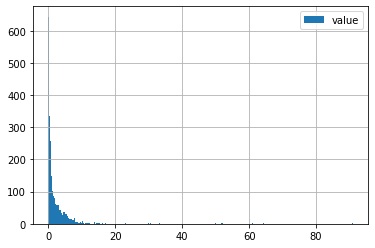

In [ ]:
number_of_different_values = zinc['value'].nunique()
hist_zinc = zinc['value'].hist(bins = number_of_different_values, legend = True)

Liste deskriptiver Statistiken

In [ ]:
zinc.describe()
# zinc['value'].describe()

,value,id
count,6137.000000,6137.000000
mean,2.228589,15555.259573
std,3.975321,8645.544374
min,0.000000,1008.000000
25%,0.340000,10185.000000
50%,0.980000,14269.000000
75%,2.980000,19108.000000
max,90.950000,93600.000000


Find Edamer

In [ ]:
edam = zinc.loc[zinc['description'] == "Cheese, edam"]
edam

,index,value,units,nutrient,group,id,description,category,manufacturer
2,151,3.75,mg,"Zinc, Zn",Elements,1018.0,"Cheese, edam",Dairy and Egg Products,


**Frage:** Hat Edamer einen überdurchschnittlichen Zinkgehalt? \
**Antwort:** Ja, da Zinkgehalt von Edamer mit 3.75 mg größer als arithmetisches Mittel (2.22 mg).

**Frage:** Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt als Edam? \
**Antwort:** Ja, da 75% Perzentil kleiner als Wert von Edamer ist.


In [ ]:
zinc_max = zinc.loc[zinc['value'] == zinc["value"].max()]
zinc_max

,index,value,units,nutrient,group,id,description,category,manufacturer
5470,333726,90.95,mg,"Zinc, Zn",Elements,15170.0,"Mollusks, oyster, eastern, canned",Finfish and Shellfish Products,


**Frage:** Welches Nahrungsmittel hat den
maximalen Zinkgehalt? \
**Antwort:** Dosenaustern